## Importing Package

In [1]:
# %pip install missingno
# %pip install hydra-core
# !pip install psycopg2-binary

In [2]:
%matplotlib notebook

import pandas as pd
import numpy as nyp
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data
import pandas as pd
import missingno as msno
import math
from pycaret.regression import *
import psycopg2
import numpy as np
import dagshub
import mlflow
import hydra
import pandas as pd
from omegaconf import DictConfig
from pycaret.regression import setup
import os
import warnings

warnings.filterwarnings('ignore')

In [3]:
sns.set_style("whitegrid")
custom_palette = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974", "#64B5CD"]
sns.set_palette(custom_palette)

In [4]:
df = pd.read_csv('../../data/raw/01_Melbourne_Residential.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,S,Brace,3/9/2023,6.4,3078,...,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

## Data Preparation

In [6]:
import hydra
from omegaconf import DictConfig
import os
import pandas as pd
from pycaret.regression import setup, compare_models, finalize_model, predict_model

def main(cfg: DictConfig):
    df = pd.read_csv(cfg.data.path)

    print("Data Loaded:")
    display(df.head())

    # PyCaret Setup
    reg1 = setup(
        data=df,
        target=cfg.model.target,
        ignore_features=cfg.model.ignore_features,
        imputation_type=cfg.model.imputation_type,
        numeric_imputation=cfg.model.numeric_imputation,
        categorical_imputation=cfg.model.categorical_imputation,
        normalize=cfg.model.normalize,
        session_id=cfg.model.session_id
    )

    best_model = compare_models(budget_time=0.1)
    final_model = finalize_model(best_model)
    predictions = predict_model(final_model, data=df)

    os.makedirs("../../data/predictions", exist_ok=True)
    predictions_path = "../../data/predictions/predictions.csv"
    predictions.to_csv(predictions_path, index=False)
    print(f"Predictions saved at: {predictions_path}")

In [ ]:
hydra.initialize(config_path="../../conf", job_name="karthik_config")
cfg = hydra.compose(config_name="karthik_config")
main(cfg)

Data Loaded:


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,S,Brace,3/9/2023,6.4,3078,...,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 9467, number of used features: 15
[LightGBM] [Info] Start training from score 1.610964
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1505
[LightGBM] [Info] Number of data points in the train set: 8543, number of used features: 15
[LightGBM] [Info] Start training from score -3.811120
[LightGBM] [Info] Star

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(13580, 21)"
4,Transformed data shape,"(13580, 30)"
5,Transformed train set shape,"(9506, 30)"
6,Transformed test set shape,"(4074, 30)"
7,Ignore features,4
8,Numeric features,9
9,Categorical features,7


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:36:02
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,239149.6271,127064952053.6662,355399.5872,0.6756,0.4200,0.2540,2848.9580


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

## Modelling

In [33]:
best = reg1.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,187632.2363,93047831805.6709,303686.1952,0.7631,0.2304,0.1834,8.6910
lightgbm,Light Gradient Boosting Machine,188923.2697,94263584263.5359,305563.6439,0.7601,0.2306,0.1842,8.8780
et,Extra Trees Regressor,187619.7979,95108674034.9168,306986.9126,0.7580,0.2257,0.1786,9.3020
rf,Random Forest Regressor,195198.1284,101722553583.7949,317581.7823,0.7409,0.2353,0.1888,10.2220
gbr,Gradient Boosting Regressor,202333.0471,101869548223.8378,318107.0169,0.7401,0.2440,0.1992,9.6410
xgboost,Extreme Gradient Boosting,201318.9084,103850601109.7004,320517.9849,0.7358,0.2455,0.1965,8.8470
knn,K Neighbors Regressor,221122.6380,127388227975.5616,355567.5388,0.6754,0.2666,0.2094,8.0320
huber,Huber Regressor,233996.0739,136507145707.8500,368004.9949,0.6523,0.3073,0.2361,8.8760
br,Bayesian Ridge,247943.4917,137591569606.3580,369738.8931,0.6489,0.3265,0.2635,9.1900
ridge,Ridge Regression,248818.8238,137981664450.1936,370270.6195,0.6479,0.3277,0.2652,8.7750


2025/02/26 14:43:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 14:43:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run CatBoost Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/7bc8c43d454341668831393938228b9f.
2025/02/26 14:43:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.
2025/02/26 14:44:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 14:44:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Light Gradient Boosting Machine at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/5a77d346787a41af9013afaaaa30f51

In [34]:
best = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,188235.1918,120713244664.4652,347438.1163,0.7163,0.2277,0.1762
1,189343.6423,95590211953.4740,309176.6679,0.7654,0.2255,0.1782
2,190110.2140,94558528214.3252,307503.7044,0.7646,0.2377,0.1882
3,191306.9353,104114298859.9772,322667.4741,0.7358,0.2245,0.1731
4,168966.7897,63097454811.7447,251192.0676,0.7986,0.2055,0.1692
5,197062.7949,106093745050.0764,325720.3479,0.7277,0.2278,0.1826
6,186352.9790,87305189117.1993,295474.5152,0.7805,0.2243,0.1788
7,188607.5129,85879719495.5317,293052.4177,0.7663,0.2296,0.1820
8,174194.3064,73139443749.9079,270443.0508,0.7998,0.2119,0.1654


2025/02/26 14:52:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 14:53:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Extra Trees Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/5323c4c8cea140eea615e563797b9f09.
2025/02/26 14:53:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


## Hyperparameter Tuning

In [35]:
# https://github.com/pycaret/pycaret/issues/4051

In [36]:
best.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [37]:
tuned_model = tune_model(
    best, 
    n_iter=25, 
    return_tuner=True, 
    search_library='optuna', 
    choose_better=True, 
    optimize='RMSLE'
) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,208319.0420,145403822621.1551,381318.5317,0.6583,0.2466,0.1872
1,200348.2391,108846068837.6014,329918.2760,0.7329,0.2430,0.1867
2,201674.0529,108739953780.8504,329757.4166,0.7293,0.2503,0.1928
3,199088.6865,113363064643.5910,336694.3193,0.7123,0.2360,0.1775
4,177609.6347,67468648581.2804,259747.2783,0.7846,0.2168,0.1779
5,200604.4986,114159049618.3684,337874.3104,0.7070,0.2382,0.1841
6,198111.8989,99344869199.1326,315190.2111,0.7503,0.2354,0.1839
7,190759.2404,93955873265.7916,306522.2231,0.7443,0.2400,0.1827
8,186628.2138,89532055696.4867,299219.0764,0.7549,0.2250,0.1724


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 8516, number of used features: 17
[LightGBM] [Info] Start training from score 1.610263
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[

2025/02/26 15:46:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 15:46:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Extra Trees Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/e0aa8022936c4432bd2c2bd5dcdb21ad.
2025/02/26 15:46:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


## Model Evaluation

In [38]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,187410.9389,114094630945.1734,337778.9676,0.7469,0.2236,0.1729


,Suburb,Rooms,Type,Method,Seller,Date,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Price,prediction_label
5799,Endeavour Hills,4,h,SP,O'Brien,2024-07-15,28.5,4,2,2.0,669,1980.0,Casey,-37.964661,145.270065,South-Eastern Metropolitan,625000,769780.82
10596,Airport West,3,h,PI,Nelson,2024-02-25,13.5,3,1,1.0,585,NaN,Moonee Valley,-37.720001,144.878006,Western Metropolitan,720000,720057.50
7471,Rosanna,3,h,S,Fletchers,2023-09-17,11.4,3,2,1.0,323,2015.0,Banyule,-37.735901,145.061401,Eastern Metropolitan,1012000,1047690.74
2308,Hawthorn,3,h,S,Marshall,2023-11-12,4.6,3,1,1.0,342,1900.0,Boroondara,-37.813999,145.021194,Southern Metropolitan,1712000,1652715.00
2602,Kensington,3,t,S,Edward,2024-07-01,3.4,3,2,2.0,0,1999.0,Melbourne,-37.794819,144.921921,Northern Metropolitan,967000,933730.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13413,Armadale,2,u,SP,hockingstuart,2023-07-30,6.3,2,0,0.0,0,NaN,Stonnington,-37.856800,145.016098,Southern Metropolitan,546000,624095.00
10948,Canterbury,3,h,PI,Marshall,2023-07-26,9.0,3,2,2.0,361,1995.0,Boroondara,-37.820599,145.078506,Southern Metropolitan,1850000,1749005.00
12172,Kew,4,h,S,Jellis,2023-11-27,5.6,4,3,2.0,627,NaN,Boroondara,-37.791500,145.034805,Southern Metropolitan,2245000,2356000.00
2561,Fitzroy North,2,h,VB,Nelson,2024-07-01,3.6,2,1,1.0,184,1900.0,Yarra,-37.784931,144.988785,Northern Metropolitan,1350000,1407415.00


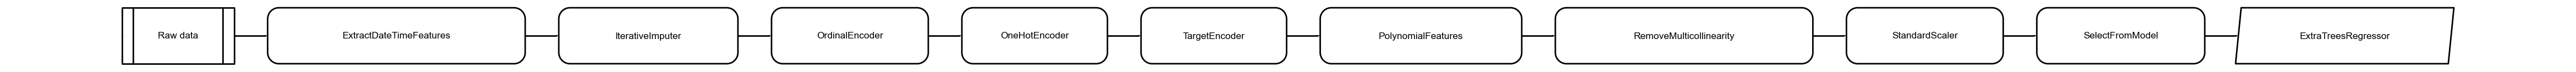

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
evaluate_model(best)

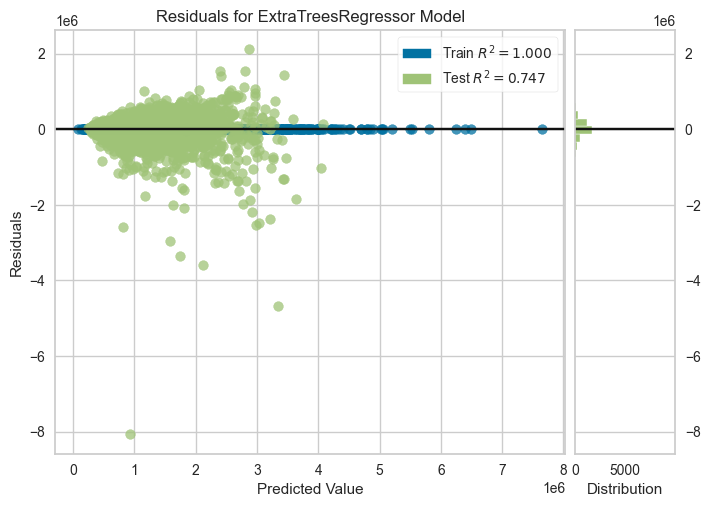

In [40]:
plot_model(best, plot='residuals', plot_kwargs={'observed': True, 'color': 'blue'})

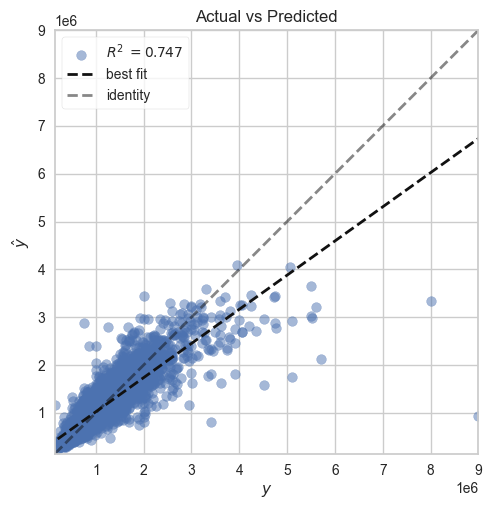

In [41]:
plot_model(best, plot='error', plot_kwargs={'alpha': 0.5, 'title': 'Actual vs Predicted'})

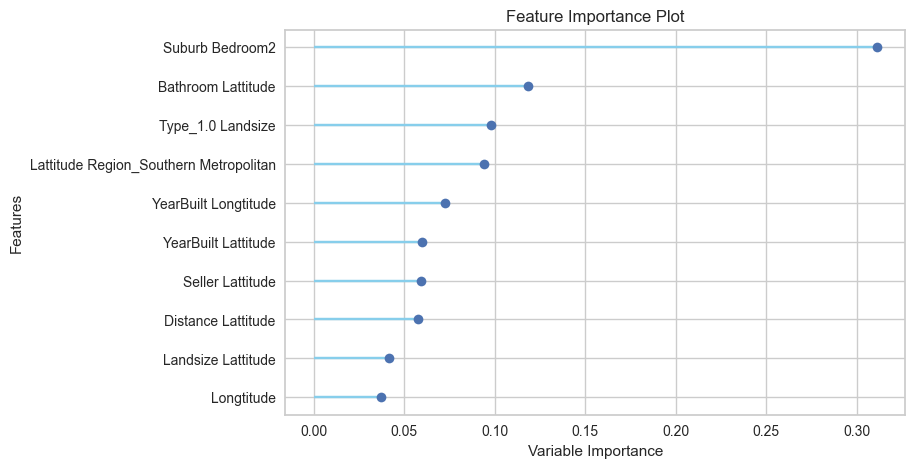

In [43]:
plot_model(best, plot='feature', plot_kwargs={'top_n': 15, 'figsize': (10,6)})

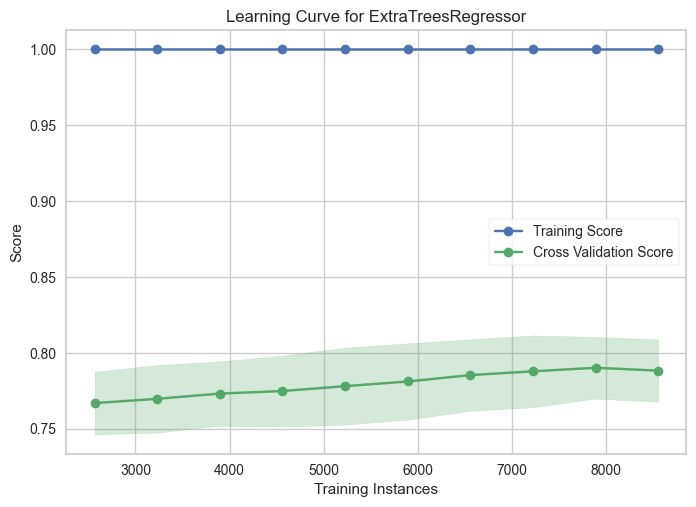

In [45]:
plot_model(best, plot='learning')

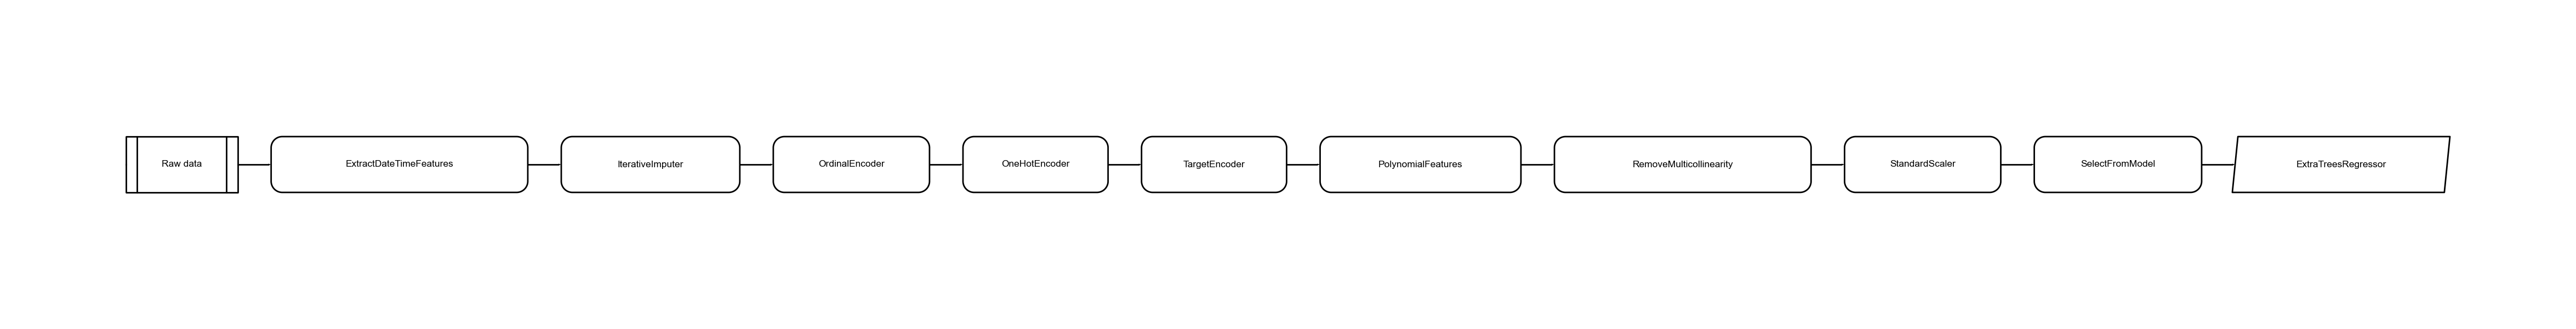

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [51]:
# to view more charts the below can be used
evaluate_model(best)

In [52]:
# ai explainability is also an important component
# using the below plot, we can understand how the model is arriving at its prediction
# interpret_model(best, plot = 'reason', observation = 1)

## Saving Model

In [54]:
final_model = finalize_model(best)
save_model(best, 'house_pricing_pipeline')

2025/02/26 15:51:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 15:51:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Extra Trees Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/45390f0c2ee343e5a0f8f6d806423e13.
2025/02/26 15:51:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


Transformation Pipeline and Model Successfully Saved


Uploading files (1) to "gangula-karthik/MLOps-Assignment"...

Upload finished successfully!

(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('iterative_imputer',
                  TransformerWrapper(transformer=IterativeImputer(cat_estimator=LGBMClassifier(n_jobs=-1,
                                                                                               random_state=123),
                                                                  cat_estimator_prepare_for_categoricals_type='fit_params_categorical_feature',...
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.55))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('feature_selection',
                  TransformerWrapper(exclude=[],
                                     transformer=SelectFromModel(e

In [55]:
# to confirm if the model is loaded correctly
load_model_pipline = load_model('house_pricing_pipeline')
load_model_pipline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/90/q7dj_p6j3gx0cls87s3y0myc0000gq/T/joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['Date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('iterative_imputer',
                 TransformerWrapper(transformer=IterativeImputer(cat_estimator=LGBMClassifier(n_jobs=-1,
                                                                                              random_state=123),
                                                                 cat_estimator_prepare_...
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.55))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('feature_selection',
                 TransformerWrapper(exclude=[],
                                    transformer=SelectFromModel(estimator=RandomForestRegressor(),
                                                                max_features=12,
                                                                threshold=-inf))),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

## Registering Model

In [62]:
dagshub.init(repo_owner='gangula-karthik', repo_name='MLOps-Assignment', mlflow=True)
final_best = finalize_model(best)

Initialized MLflow to track repo "gangula-karthik/MLOps-Assignment"

Repository gangula-karthik/MLOps-Assignment initialized!

2025/02/26 16:07:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 16:08:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Extra Trees Regressor at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/14f31ce843b14a2d9603fc313947e055.
2025/02/26 16:08:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


In [78]:
metrics_df = pull()
metrics_df

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,187410.9389,1.140946e+11,337778.9676,0.7469,0.2236,0.1729


In [79]:
mae = metrics_df.iloc[0, 1]
rmse = metrics_df.iloc[0, 3]
r2_score = metrics_df.iloc[0, 4]
rmsle = metrics_df.iloc[0, 5]

mae, rmse, r2_score, rmsle

(187410.9389, 337778.9676, 0.7469, 0.2236)

In [88]:
mlflow.end_run()

In [87]:
with mlflow.start_run():
    mlflow.log_param("model_type", "scikit-learn pipeline")

    mlflow.log_metric("mae", mae)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2_score)
    mlflow.log_metric("rmsle", rmsle)

    model_uri =  mlflow.sklearn.log_model(final_best, "house_pricing_pipeline")
    
    model_details = mlflow.register_model(
        model_uri=model_uri.model_uri,
        name="HousePricingModel_Karthik"
    )

    print("Model and metrics successfully logged to MLflow on DAGsHub!")

2025/02/26 16:38:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'HousePricingModel_Karthik'.
2025/02/26 16:39:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HousePricingModel_Karthik, version 1
Created version '1' of model 'HousePricingModel_Karthik'.


Model and metrics successfully logged to MLflow on DAGsHub!


2025/02/26 16:39:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run bald-bass-857 at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0/runs/b1f1c8b839dc4dacbd6e618777a0fd1c.
2025/02/26 16:39:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/gangula-karthik/MLOps-Assignment.mlflow/#/experiments/0.


In [89]:
MODEL_NAME = "HousePricingModel_Karthik"
MODEL_VERSION = "latest"  # You can specify a version like "1" if needed
model = mlflow.sklearn.load_model(f"models:/{MODEL_NAME}/{MODEL_VERSION}")
model

Pipeline(memory=Memory(location=None),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['Date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('iterative_imputer',
                 TransformerWrapper(transformer=IterativeImputer(cat_estimator=LGBMClassifier(n_jobs=-1,
                                                                                              random_state=123),
                                                                 cat_estimator_prepare_for_categoricals_type='fit_params_categorical_feature',...
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.55))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('feature_selection',
                 TransformerWrapper(exclude=[],
                                    transformer=SelectFromModel(estimator=RandomForestRegressor(),
                                                                max_features=12,
                                                                threshold=-inf))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])